# Session 4 Exercises

These are the exercises from the session 4 notes

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 4. Euler's method

### In-class

1. Using a simple loop, solve the differential equation $dy/dx=-ky$ using Euler’s method. For flexibility, set up $\Delta x$ as a variable, calculate the possible values of $x$ and store the results in an array. You will also need to store $y$ in an array. Use $k=1.2$ and solve for $0\le x\le 10$, with $y(0)=1.0$. (You might find the basic set-up below useful.)  Plot the approximate and exact solutions.

[1.00000000e+00 4.00000000e-01 1.60000000e-01 6.40000000e-02
 2.56000000e-02 1.02400000e-02 4.09600000e-03 1.63840000e-03
 6.55360000e-04 2.62144000e-04 1.04857600e-04 4.19430400e-05
 1.67772160e-05 6.71088640e-06 2.68435456e-06 1.07374182e-06
 4.29496730e-07 1.71798692e-07 6.87194767e-08 2.74877907e-08
 1.09951163e-08 4.39804651e-09 1.75921860e-09 7.03687442e-10
 2.81474977e-10 1.12589991e-10 4.50359963e-11 1.80143985e-11
 7.20575940e-12 2.88230376e-12 1.15292150e-12 4.61168602e-13
 1.84467441e-13 7.37869763e-14 2.95147905e-14 1.18059162e-14
 4.72236648e-15 1.88894659e-15 7.55578637e-16 3.02231455e-16
 1.20892582e-16]


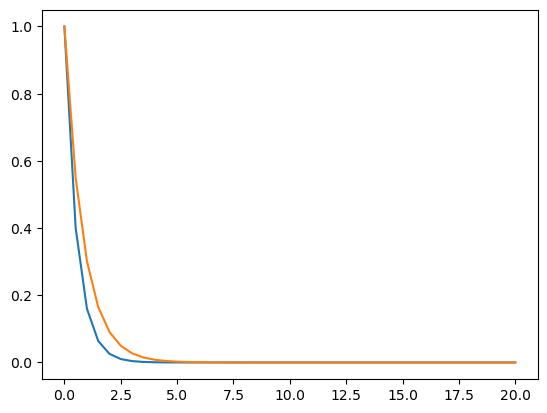

In [7]:
# Specify step size and simulation length
dx = 0.5
total_x = 20
N = int(total_x/dx)
x = np.linspace(0,total_x,N+1)
# Initial condition
y0 = 1.0
k = 1.2
y = np.zeros(N+1)
y0 = 1.0
y[0] = y0

for i in range(N):
    y[i+1] = y[i] -k*y[i]*dx

print(y)

plt.plot(x, y)
plt.plot(x, np.exp(-k*x))

2.	Now write a function to calculate N steps of the Euler solver (use the specification below).  At the start of the function, you will need to create an array to store results, which you will return (note that it should be length N+1 if you store the initial conditions for t=0).  Use this Euler function for the problem in question 1 (you will need to define and pass the function `fun_rhs` though in this case it is extremely simple!), and explore how the step size affects agreement. Look at the effect of increasing $\Delta x$.

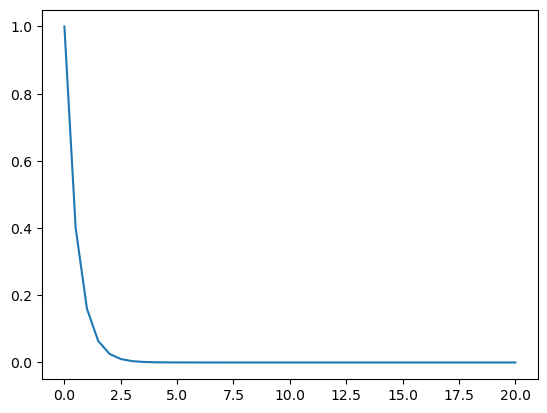

In [30]:
def euler_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using Euler's method.
    Inputs ...
    Returns: array of length N+1 with values of y
    """
    results = np.zeros(N+1)
    results[0] = y0

    t = 0
    for i in range(N):
        t+= dt
        results[i+1] = results[i] + dt*fun(results[i], t)
    return results

def fun_rhs(y, t):
    return -1.2 * y

plt.plot(x, euler_solver(fun_rhs, 1, 0.5, N))


### Further work

1. Create a set of four sub-plots for values of $\Delta x$ that give divergence, oscillation, stability but poor agreement, and good agreement respectively. Use the `fig = plt.figure, ax = fig.add_subplot, ax.plot` protocol that we discussed in Session 1.

2. Solve the equation $dy/dx=xy^2$ with $y(0)=-1$ using Euler’s method. What values of $\Delta x$ give stable solutions? How well do these match the exact solution (you should be able to solve this relatively easily)?

## 4.3 Beyond first order and one dimension

### In-class

1.	Update your Euler function above to solve more generally for arrays.  You can allow the results array `y` to be of arbitrary dimension (in which case you will need to use the NumPy function to find the right size) or assume a simple two-component problem as seen for the SHO.

In [45]:
def euler_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using Euler's method.
    Inputs ...
    Returns: array of length N+1 with values of y
    """
    results = np.zeros((N+1, 2))
    results[0] = y0

    t = 0
    for i in range(N):
        t+= dt
        results[i+1] = results[i] + dt*fun(results[i], t)
    return results

def rhs_sho_function(y,t):
    """Implement RHS of SHO equation for y (array 
    containing x and v). Note that t is unused here but 
    is passed for compatibility with general
    solvers.  Defines k and m within function"""
    k = 1.0
    m = 1.0
    # Separate out for clarity
    x = y[0]
    v = y[1]
    # Calculate update
    dx = v
    dv = -k*x/m
    return np.array([dx, dv])


2.	Apply this function to the simple harmonic oscillator above, and plot your result (you should know what it looks like!). Check the effect of step size.

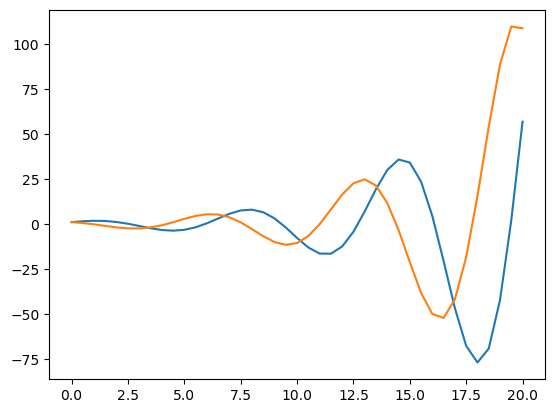

In [43]:
plt.plot(x, euler_solver(rhs_sho_function, [1,1], 0.5, N))

### Further work

1. Add a damping term ($-c dx/dt$ on the right hand side) to the SHO solver you have created above in question 4 above and explore the effect of the damping coefficient, c. Plot your solutions using sub-plots.

2.	You could explore adding a driving term on the RHS of the SHO equation if you have time.

## 5 Beyond Euler

### In-class

1.	Write a function to implement a fourth-order RK solver, using the equations above, using your Euler function as a basis (assume that you will solve a second-order equation which will be split into two coupled first-order equations).

In [ ]:
def rk_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using Euler's method.
    Inputs ...
    Returns: array of length N+1 with values of y
    """
    results = np.zeros((N+1, 2))
    results[0] = y0

    t = 0
    for i in range(N):
        t+= dt
        k1 = dt*fun(results[i], t)
        k2 = dt*fun(results[i])
        results[i+1] = results[i] + dt*fun(results[i]+dt/2, t)
    return results

2. Apply it to a pendulum, for the moment working simply with the linear solution: $$\frac{d^2 \theta}{dt^2} =-\frac{g}{L} \theta$$ where $g=9.8m/s^2$, the acceleration due to gravity, and $L=1m$, the length of the pendulum. You will need to:

    1. break this into two coupled equations;
	2. write an appropriate function for the right-hand sides;
	3. write a loop calling your RK4 solver to propagate the motion of the pendulum.

How large can the step size be while still giving a stable solution? (If you have time, try the same solution with an Euler solver, and compare the necessary step sizes). Be sure to make the initial angle (**in radians!**) small enough that the approximation is good.


### Further work

1.	Write either a predictor-corrector function or a mid-point function

2. Now model the non-linear pendulum, comparing the RK4 and the function that you coded in question 1 of this further work:
$$\frac{d^2 \theta}{dt^2} = \frac{-g}{L} \sin(\theta)$$
You will need to write a new function for the right-hand side. Start with an angle of $\pi/2$, and compare the two methods for the same step size.


3. You should now extend the model further: test an initial angle of just less than $\pi$ (to observe strongly non-linear effects); add a damping term ($-c d\theta/dt$) and test the effect of $c$.

## 6. Boundary Value Problems

### In-class

1. Write a simple piece of code (either as a function or just a loop) to find the initial vertical velocity at which a ball moving vertically under the influence of gravity needs to be launched from the ground at $t=0s$ so that it reaches the ground again at $t=10s$. You should use the RK4 solver that you have written, and implement a basic bisection or secant solver, as described in the text above (you could copy this from your answers to Session 2). Plot the trajectory versus time.

2.	If you have time, try storing and plotting all the trajectories that the solver works through, to see how the process works.

### Further work

1. Try extending the solver so that you are now working in two spatial dimensions ($x$ and $z$, say). You will need to be careful about how you specify your equations: you will need position and velocity for both dimensions (four variables in total). You will need to specify both $x$ and z at $t_0$ and $t_1$.

2.	If you want to extend this model, you could add an air-resistance term (proportional to the velocity) in one or two dimensions.

## 7. SciPy Functions

### In-class

1.	Use `solve_ivp` and `odeint` to solve for the linear pendulum model from section 5.

### Further work

1.	Write a non-linear pendulum function that takes parameters (`g`, `L` and a damping term) and pass it to `solve_ivp` or `odeint` to make sure that you understand how optional arguments are passed.